In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import gaussian_kde
from scipy.optimize import brentq

from scipy.stats import zscore
from sklearn.preprocessing import 

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



In [285]:
df_train = pd.read_csv('Copy of churn-bigml-80.csv')
df_test = pd.read_csv('Copy of churn-bigml-20.csv')

In [286]:
df_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [287]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [288]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


We can see that in the info there is no columns containing null values. So here we do not need to handle missing value.

In [289]:
#Check duplicated values for df_train
df_train.duplicated().sum()

0

In [290]:
df_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [291]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [292]:
#Check duplicated values for df_test
df_test.duplicated().sum()

0

Here, we observe that several columns have data types as “object” and “bool”: State, International plan, Voice mail plan, and Churn. The remaining columns are numerical. Among these, the International plan, voice mail plan, and Churn columns have only two unique values: Yes/No or True/False. To facilitate charting and analysis, we will convert the object and bool types to categorical.

In [293]:
convert_cols = ['International plan', 'Voice mail plan', 'Churn']
def convert_to_cat(cv, convert_cols):
    for i in convert_cols:
        cv[i] = cv[i].astype('object')
convert_to_cat(df_train, convert_cols)
convert_to_cat(df_test, convert_cols)


EDA

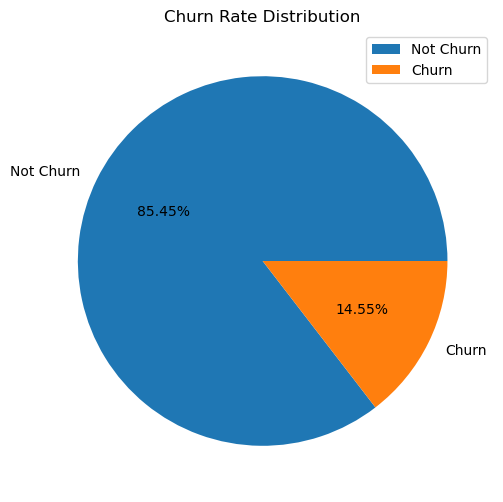

In [294]:
plt.figure(figsize=(10,6))
plt.pie(df_train['Churn'].value_counts(), labels=['Not Churn', 'Churn'], autopct='%.2f%%')
plt.title('Churn Rate Distribution')
plt.legend()
plt.show()

The Customer Churn Rate (also known as Churn Rate) is the percentage of customers who have stopped using a company’s product or service within a specific period. In this case, the churn rate is 14.55%, which is relatively high. Let’s work together to improve it!

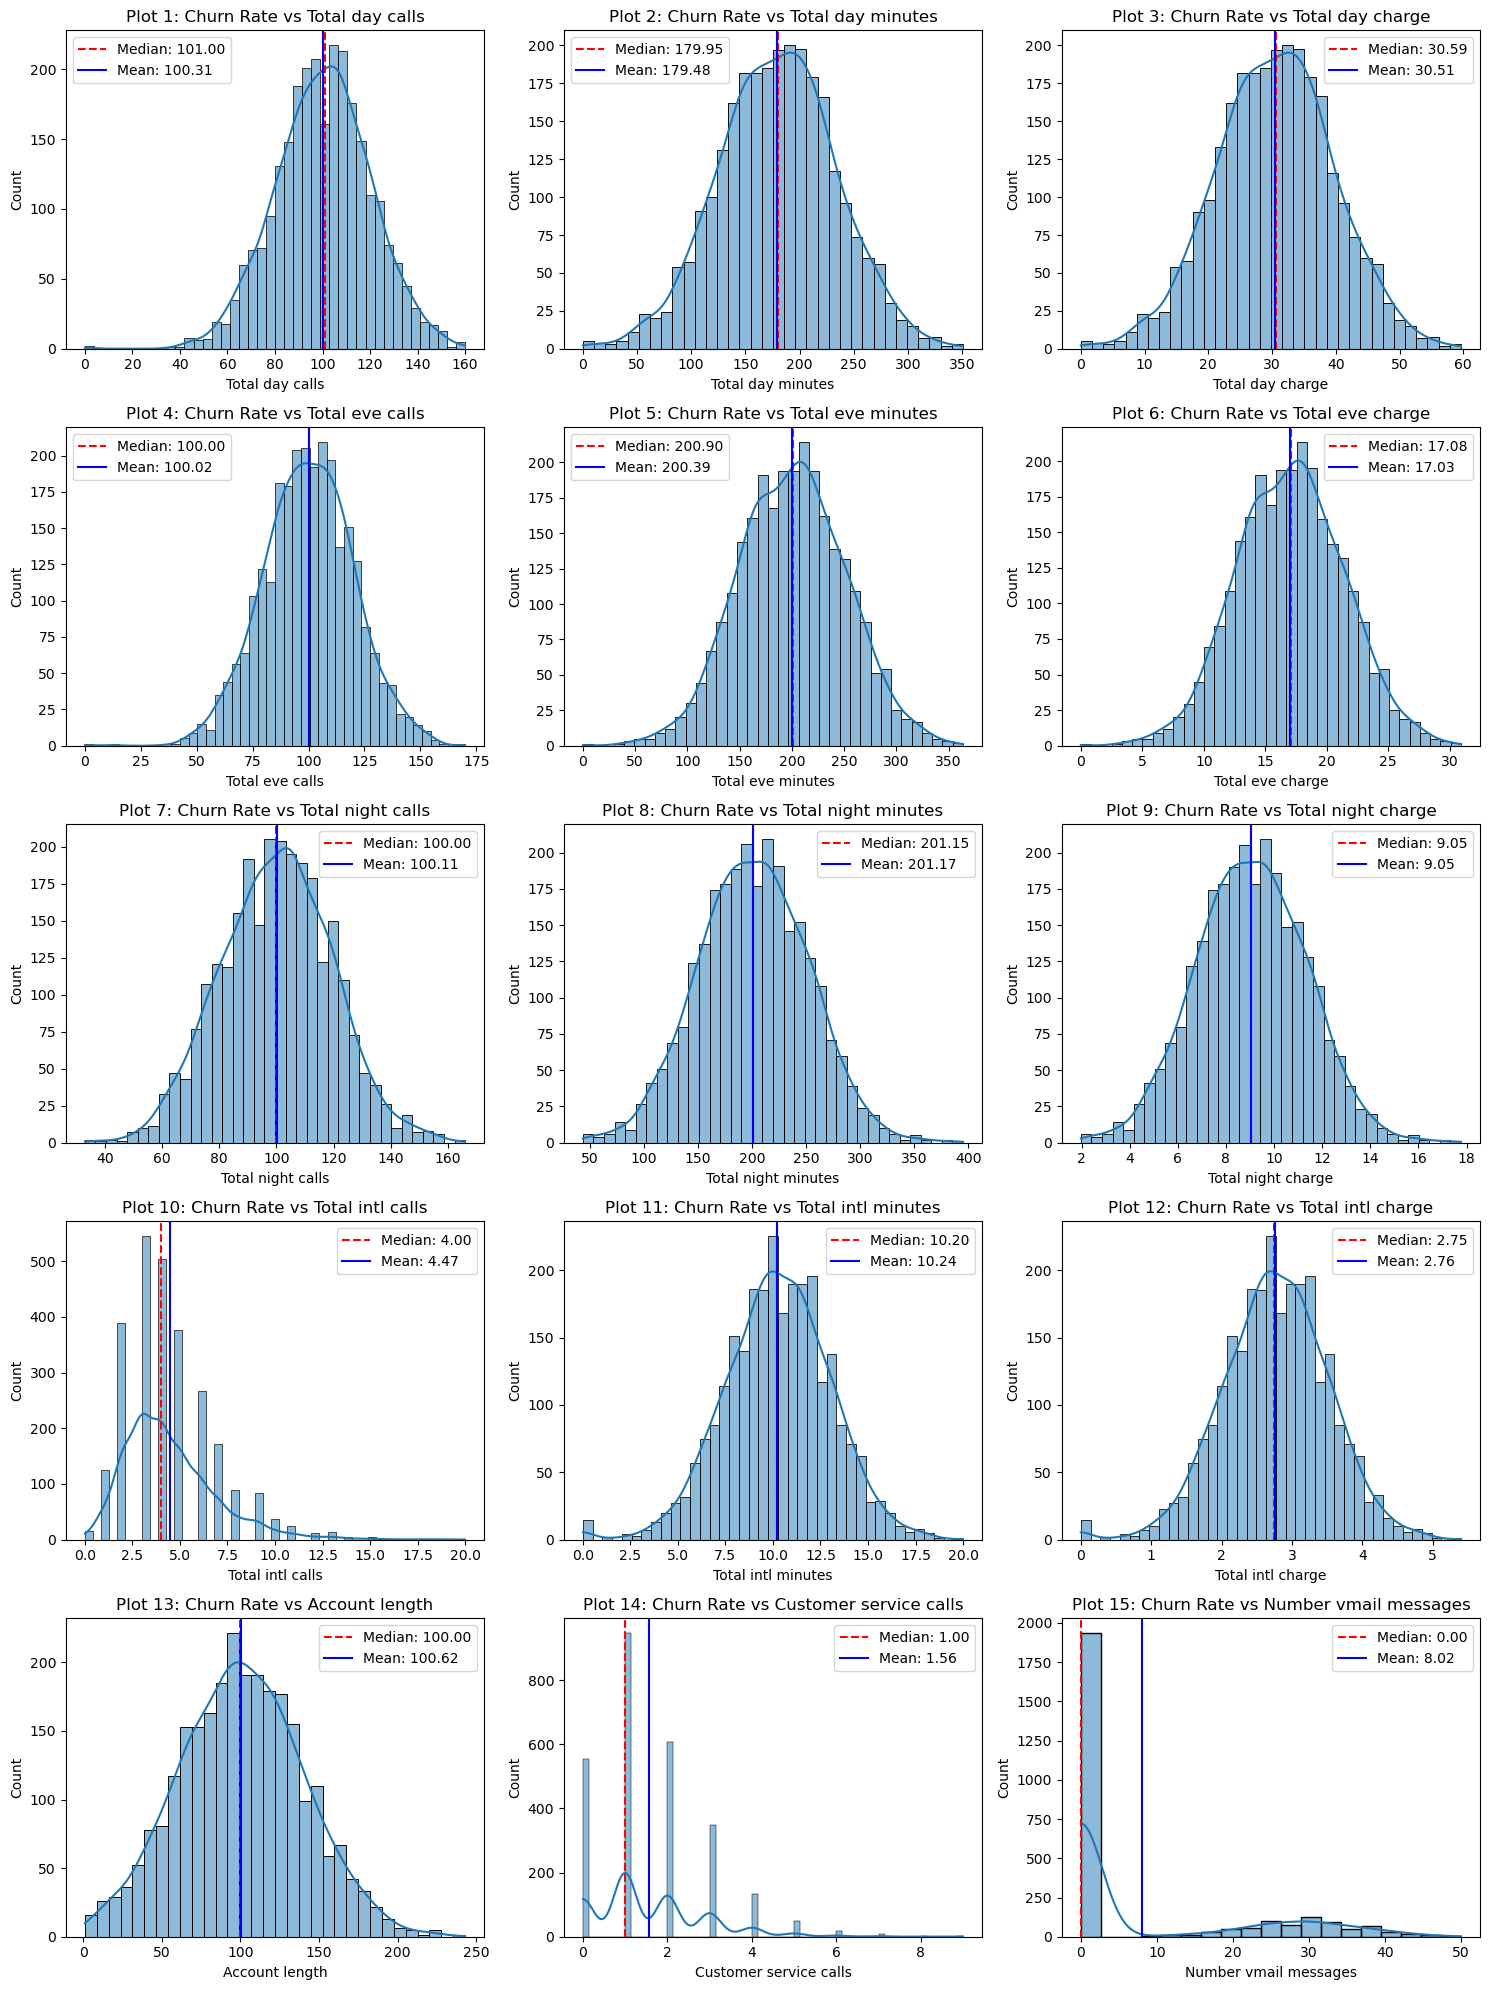

In [295]:
cols_num = ['Total day calls', 'Total day minutes', 'Total day charge',
            'Total eve calls', 'Total eve minutes', 'Total eve charge',
            'Total night calls', 'Total night minutes', 'Total night charge',
            'Total intl calls', 'Total intl minutes', 'Total intl charge',
            'Account length', 'Customer service calls', 'Number vmail messages']
n_rows = 5
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for i in range(0, n_rows):
    for y in range(0, n_cols):
        index = i * n_cols + y # index to loop through list cols_num
        if index < len(cols_num): # len(cols_num): We want to plot 12 plots.
            ax_i = ax[i, y]
            sns.histplot(data=df_train, x=cols_num[index], ax=ax_i, kde=True)
            ax_i.set_title(f'Plot {index+1}: Churn Rate vs {cols_num[index]}')
            
            # Calculate the median and mean.
            median_value = df_train[cols_num[index]].median()
            mean_value = df_train[cols_num[index]].mean()
            
            # Add a vertical line at the median.
            ax_i.axvline(median_value, color='r', linestyle='--', label=f'Median: {median_value:.2f}')
            # Add a vertical line at the mean.
            ax_i.axvline(mean_value, color='b', linestyle='-', label=f'Mean: {mean_value:.2f}')
            
            # Hiển thị chú thích
            ax_i.legend()

plt.tight_layout()
plt.show()


The frequency charts reveal the data distribution. At first glance, it appears that almost all features in the table are represented in a bell-shaped (normal) distribution, except for chart 10. The evidence lies in the fact that nearly all charts exhibit this bell-shaped pattern, with data spread evenly on both sides of the median, and the median value closely aligning with the mean. However, for added certainty, we’ll employ additional techniques to identify which features follow a normal distribution and which do not.

In Plot 15, we observe that the median of this chart lies at the value of 0. This means that 50% of the values for the Number vmail messages feature are 0.

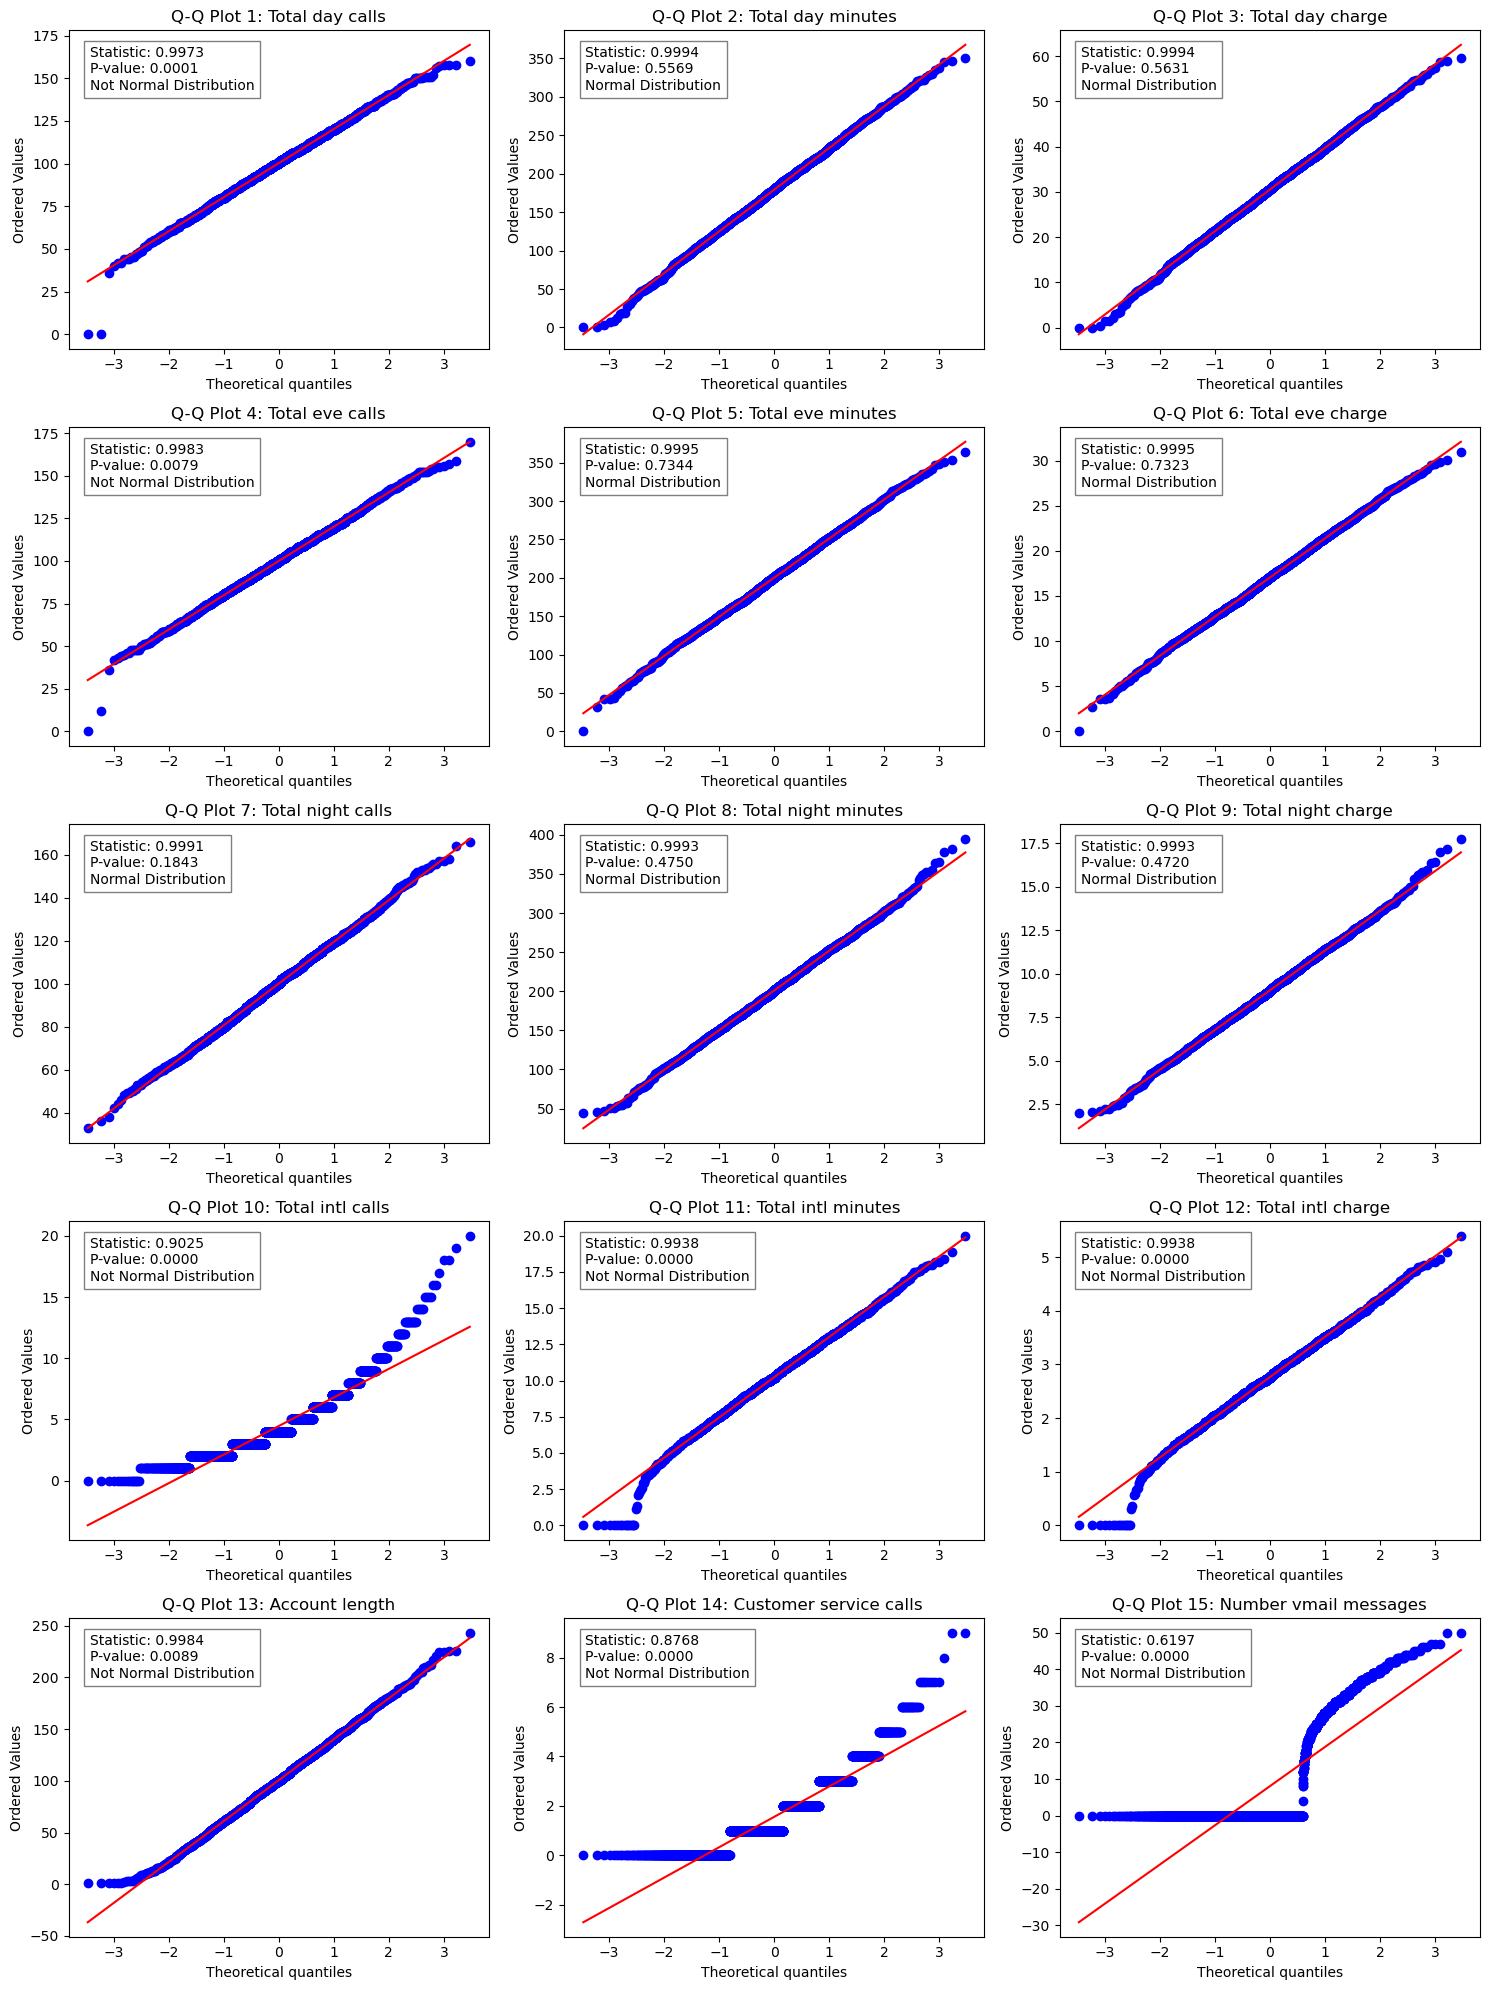

In [296]:
#Using Q-Q plot and Shapiro-Wilk Test to find Normal Distribution

cols_num = ['Total day calls', 'Total day minutes', 'Total day charge',
            'Total eve calls', 'Total eve minutes', 'Total eve charge',
            'Total night calls', 'Total night minutes', 'Total night charge',
            'Total intl calls', 'Total intl minutes', 'Total intl charge',
            'Account length', 'Customer service calls', 'Number vmail messages']

n_rows = 5
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for i in range(n_rows):
    for y in range(n_cols):
        index = i * n_cols + y # index to loop through list cols_num
        if index < len(cols_num): # len(cols_num): We want to plot 12 plots
            ax_i = ax[i, y]
            
            # Retrieve data for the current column
            data = df_train[cols_num[index]]
            
            # Create a Q-Q plot
            stats.probplot(data, dist="norm", plot=ax_i)
            ax_i.set_title(f'Q-Q Plot {index + 1}: {cols_num[index]}')
            
            # Perform the Shapiro-Wilk test
            stat, p_value = shapiro(data)
            
            # Display the results of the Shapiro-Wilk test and the distribution on the chart
            if p_value > 0.05:
                distribution_status = "Normal Distribution"
            else:
                distribution_status = "Not Normal Distribution"
            
            ax_i.text(0.05, 0.95, 
                      f'Statistic: {stat:.4f}\nP-value: {p_value:.4f}\n{distribution_status}',
                      transform=ax_i.transAxes, verticalalignment='top', 
                      bbox=dict(facecolor='white', alpha=0.5))
            
plt.tight_layout()
plt.show()

Here, we will use Q-Q plots and the Shapiro-Wilk test to assess the distribution.

A quick explanation of Q-Q plots: A Q-Q plot (Quantile-Quantile plot) is a graphical method to verify whether a dataset follows a specific probability distribution. It is particularly useful for evaluating whether data conforms to a normal distribution or another known distribution. The Q-Q plot works by calculating quantiles of the data, sorting the actual data in ascending order, and comparing these quantiles to those of a theoretical distribution. In the plot, the x-axis represents the quantiles of the theoretical distribution, and the y-axis represents the quantiles of the actual data. The points on the graph depict the correlation between the quantiles of the actual data and those of the theoretical distribution.

However, with Q-Q plots, we can only assess visually without additional detailed evidence. Therefore, we’ll also employ the Shapiro-Wilk test. The Shapiro-Wilk test is a statistical method to check the normality assumption of data. It is particularly applicable to small datasets (ranging from 3 to 5000 rows). The test computes a test statistic (W) and a p-value to determine the final hypothesis. Typically, if W is close to 1 and the p-value is > 0.05, we accept the hypothesis that the data follows a normal distribution. Conversely, if the p-value is < 0.05, we reject that hypothesis.

Hence, when examining the charts, although Plots 1, 4, and 13 exhibit many characteristics of a normal distribution, their calculated p-values are all less than 0.05, indicating they are not normally distributed. The same holds true for Plots 11, 12, 14, and 15.

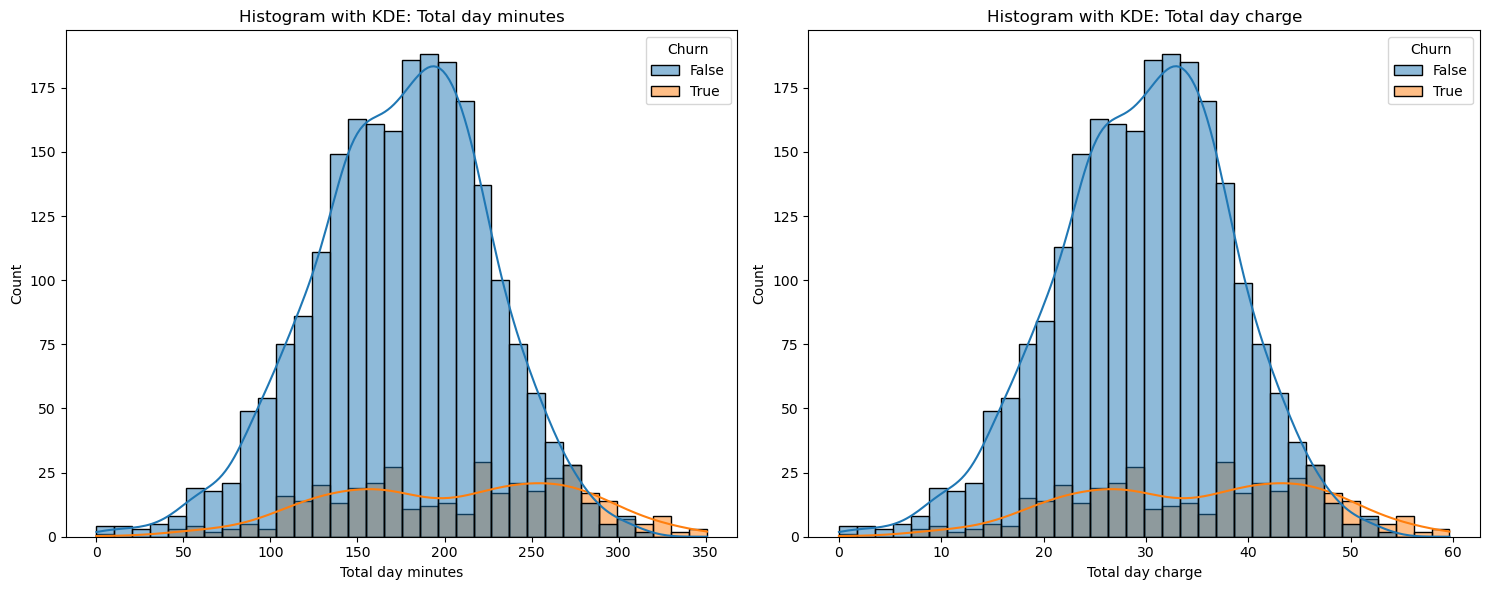

In [45]:
# The columns of data need to be charted
cols_to_plot = ['Total day minutes', 'Total day charge']

# Create subplots with 2 charts
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df_train, x=col, hue='Churn', ax=ax[i], kde=True)
    ax[i].set_title(f'Histogram with KDE: {col}')

plt.tight_layout()
plt.show()

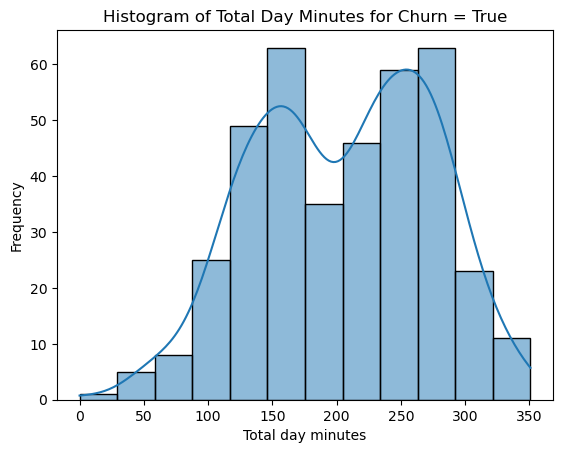

In [37]:
# Filter the data to include only rows where Churn == True
data_true_churn = df_train.loc[df_train['Churn'] == True, 'Total day minutes']

# Plot a histogram with KDE (Kernel Density Estimation) for the filtered data.
sns.histplot(data_true_churn, kde=True)
plt.title('Histogram of Total Day Minutes for Churn = True')
plt.xlabel('Total day minutes')
plt.ylabel('Frequency')
plt.show()


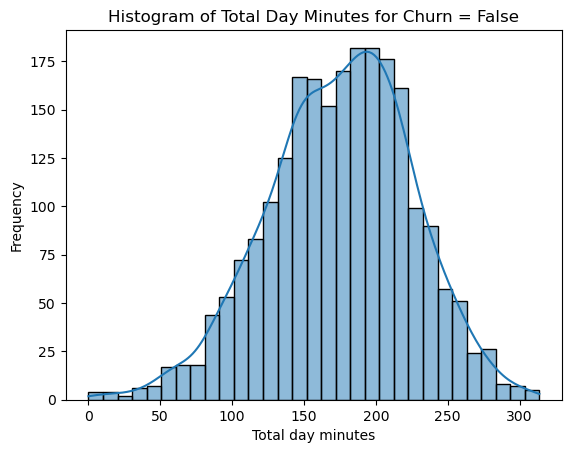

In [48]:
# Filter the data to include only rows where Churn == False
data_true_churn = df_train.loc[df_train['Churn'] == False, 'Total day minutes']

# Plot a histogram with KDE (Kernel Density Estimation) for the filtered data
sns.histplot(data_true_churn, kde=True)
plt.title('Histogram of Total Day Minutes for Churn = False')
plt.xlabel('Total day minutes')
plt.ylabel('Frequency')
plt.show()


Giao điểm giữa hai đường KDE tại x = 229.45842689562824


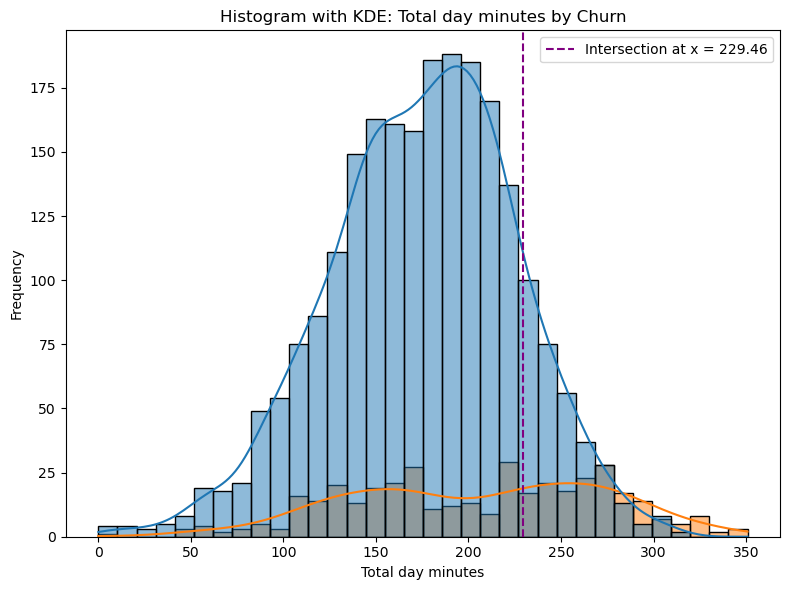

In [ ]:
# Filter the data to include only rows where Churn == True
# Filter the data to include only rows where Churn == False
data_true_churn = df_train.loc[df_train['Churn'] == True, 'Total day minutes']
data_false_churn = df_train.loc[df_train['Churn'] == False, 'Total day minutes']

# Create KDE objects
kde_true = gaussian_kde(data_true_churn, bw_method='scott')
kde_false = gaussian_kde(data_false_churn, bw_method='scott')

# Determine the x-value range for evaluating KDE
x_range = np.linspace(0, 350, 100)

# Function to calculate the difference between KDEs for True and False
def kde_difference(x):
    return kde_true(x) - kde_false(x)

# Find the intersection point
try:
    intersection_x = brentq(kde_difference, min(x_range), max(x_range))
    print(f"Giao điểm giữa hai đường KDE tại x = {intersection_x}")
except ValueError:
    intersection_x = None
    print("Không tìm thấy giao điểm giữa hai đường KDE")

# Plot histogram with KDE for ‘Total day minutes’, using ‘Churn’ as the hue
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_train, x='Total day minutes', hue='Churn', ax=ax, kde=True)

# Draw a line at the intersection point
if intersection_x:
    ax.axvline(intersection_x, color='purple', linestyle='--', label=f'Intersection at x = {intersection_x:.2f}')

ax.set_title('Histogram with KDE: Total day minutes by Churn')
ax.set_xlabel('Total day minutes')
ax.set_ylabel('Frequency')
ax.legend()

plt.tight_layout()
plt.show()



In [297]:
#Top 10 States with the most customers
Top10States = df_train[['State']].value_counts().nlargest(10).reset_index()

Top10States = Top10States.rename(columns={Top10States.columns[1]: "So_kh"})
Top10States

,State,So_kh
0,WV,88
1,MN,70
2,NY,68
3,VA,67
4,WY,66
5,OH,66
6,AL,66
7,OR,62
8,NV,61
9,WI,61


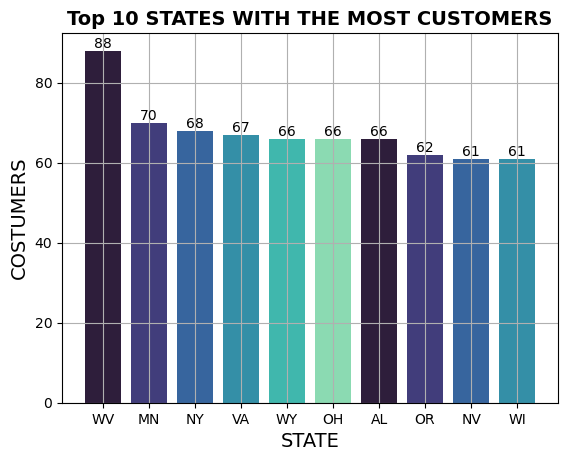

In [298]:
palette = sns.color_palette('mako')
plt.bar(Top10States['State'], Top10States['So_kh'], color=palette)
plt.title('Top 10 STATES WITH THE MOST CUSTOMERS', fontsize=14, fontweight='bold')
plt.xlabel('STATE', fontsize=14)
plt.ylabel('COSTUMERS', fontsize=14)
plt.grid(True)
# Add values above each column
for i, v in enumerate(Top10States['So_kh']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [301]:
df_train['Total minutes'] = df_train['Total day minutes'] + df_train['Total eve minutes'] + \
                            df_train['Total night minutes'] + df_train['Total intl minutes']

Top10States = df_train[['State']].value_counts().nlargest(10).reset_index()


state_total_minutes = df_train.groupby('State')['Total minutes'].sum().nlargest(10).reset_index()


state_total_minutes = state_total_minutes.rename(columns={state_total_minutes.columns[1]: "So_phut"})
state_total_minutes

,State,So_phut
0,WV,49931.6
1,MN,41771.6
2,VA,40678.4
3,OH,40268.7
4,NY,39707.7
5,WY,39511.7
6,AL,38042.9
7,NV,36582.1
8,MD,36311.8
9,OR,35869.2


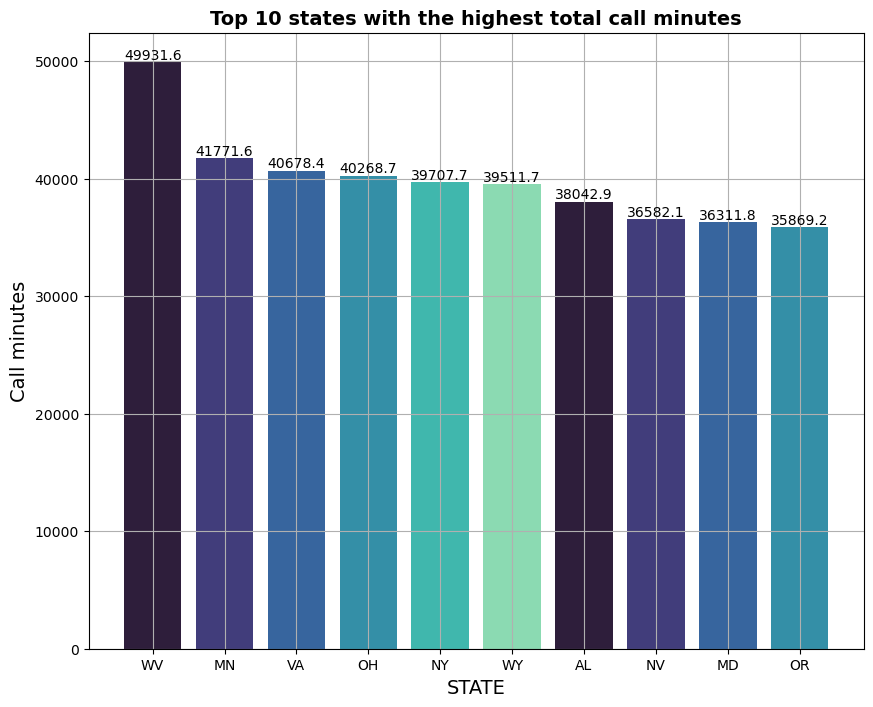

In [302]:
palette = sns.color_palette('mako')
plt.figure(figsize=(10,8))
plt.bar(state_total_minutes['State'], state_total_minutes['So_phut'], color=palette)
plt.title('Top 10 states with the highest total call minutes', fontsize=14, fontweight='bold')
plt.xlabel('STATE', fontsize=14)
plt.ylabel('Call minutes', fontsize=14)
plt.grid(True)
# Add values above each column
for i, v in enumerate(state_total_minutes['So_phut']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [303]:
df_train['Total Charge'] = df_train['Total day charge'] + df_train['Total eve charge'] + \
                            df_train['Total night charge'] + df_train['Total intl charge']

state_total_charge = df_train.groupby('State')['Total Charge'].sum().nlargest(10).reset_index()


state_total_charge = state_total_charge.rename(columns={state_total_charge.columns[1]: "So_cuoc"})
state_total_charge

,State,So_cuoc
0,WV,4989.99
1,MN,4172.00
2,VA,4038.59
3,OH,4034.94
4,WY,3970.80
5,NY,3946.71
6,AL,3926.37
7,MD,3735.26
8,NV,3636.81
9,OR,3572.34


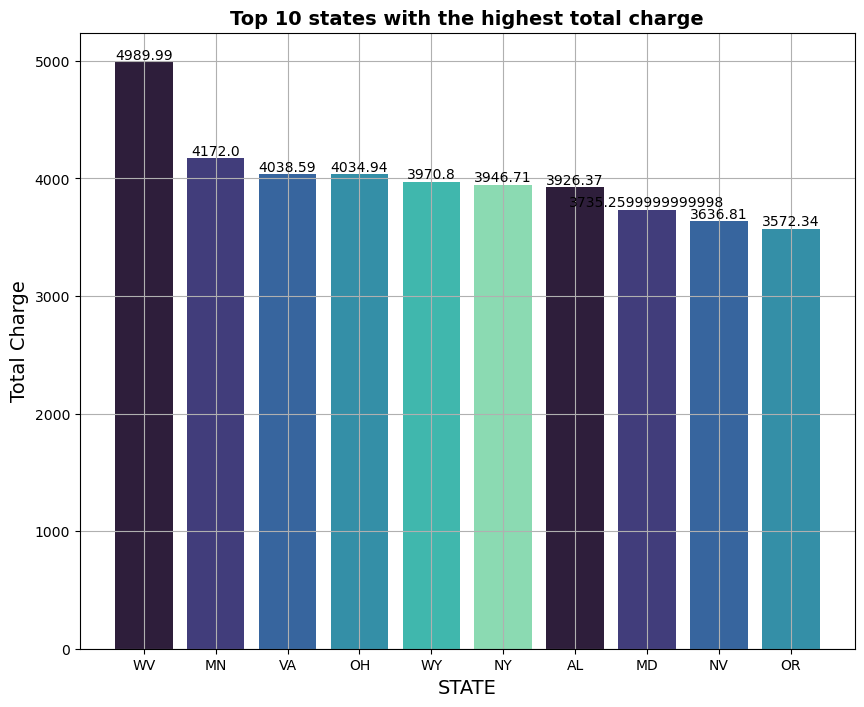

In [304]:
palette = sns.color_palette('mako')
plt.figure(figsize=(10,8))
plt.bar(state_total_charge['State'], state_total_charge['So_cuoc'], color=palette)
plt.title('Top 10 states with the highest total charge', fontsize=14, fontweight='bold')
plt.xlabel('STATE', fontsize=14)
plt.ylabel('Total Charge', fontsize=14)
plt.grid(True)
# Add values above each column
for i, v in enumerate(state_total_charge['So_cuoc']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

From the above charts, we observe that the states with the highest number of customers tend to have more calls and incur higher charges.

In [90]:
# Step 1: Calculate the sum of columns for each ‘State’
state_totals = df_train.groupby('State').agg({
    'Total day minutes': 'sum',
    'Total eve minutes': 'sum',
    'Total night minutes': 'sum'
})

# Step 2: Retrieve the top 10 ‘States’ with the highest total ‘Total day minutes’
top_day_states = state_totals.nlargest(10, 'Total day minutes').index

# Step 3: Retrieve the top 10 ‘States’ with the highest total ‘Total eve minutes’
top_eve_states = state_totals.nlargest(10, 'Total eve minutes').index

# Step 4: Retrieve the top 10 ‘States’ with the highest total ‘Total night minutes’
top_night_states = state_totals.nlargest(10, 'Total night minutes').index


# Combine the states and select the states that appear most frequently in the above lists
from collections import Counter

all_top_states = list(top_day_states) + list(top_eve_states) + list(top_night_states)
state_counter = Counter(all_top_states)

# Retrieve the states that appear most frequently (there may be fewer or more than 10 states if they have equal occurrences)
common_states = [state for state, count in state_counter.most_common(10)]

# Create a new table from these states
result_df = state_totals.loc[common_states].reset_index()

# Display the resulting table
result_df

,State,Total day minutes,Total eve minutes,Total night minutes
0,WV,15137.1,16363.4,17558.8
1,MN,12572.6,13913.0,14556.7
2,AL,12432.6,12724.7,12212.8
3,OH,12189.5,13649.4,13749.5
4,VA,11997.9,13724.0,14248.7
5,WY,11875.8,13867.5,13085.9
6,NY,11742.7,13389.8,13880.5
7,NV,10842.8,12421.9,12702.5
8,OR,10563.3,12271.7,12381.9
9,MD,11916.9,11664.9,12085.6


In [89]:
# Step 1: Calculate the sum of columns for each ‘State’
state_totals_c = df_train.groupby('State').agg({
    'Total day charge': 'sum',
    'Total eve charge': 'sum',
    'Total night charge': 'sum'
})

# Step 2: Retrieve the top 10 ‘States’ with the highest total ‘Total day charge’
top_day_states_c = state_totals_c.nlargest(10, 'Total day charge').index

# Step 3: Retrieve the top 10 ‘States’ with the highest total ‘Total eve charge’
top_eve_states_c = state_totals_c.nlargest(10, 'Total eve charge').index

# Step 4: Retrieve the top 10 ‘States’ with the highest total ‘Total night charge’
top_night_states_c = state_totals_c.nlargest(10, 'Total night charge').index

# Combine the states and select the states that appear most frequently in the above lists
from collections import Counter

all_top_states_c = list(top_day_states_c) + list(top_eve_states_c) + list(top_night_states_c)
state_counter_c = Counter(all_top_states_c)

# Retrieve the states that appear most frequently (there may be fewer or more than 10 states if they have equal occurrences)
common_states_c = [state for state, count in state_counter_c.most_common(10)]

# Create a new table from these states
result_dfc = state_totals_c.loc[common_states_c].reset_index()

# Display the resulting table
result_dfc

,State,Total day charge,Total eve charge,Total night charge
0,WV,2573.37,1390.88,790.18
1,MN,2137.37,1182.63,655.05
2,AL,2113.53,1081.61,549.58
3,OH,2072.28,1160.22,618.71
4,VA,2039.65,1166.59,641.22
5,WY,2018.89,1178.74,588.87
6,NY,1996.34,1138.14,624.66
7,NV,1843.31,1055.87,571.60
8,OR,1795.82,1043.13,557.20
9,MD,2025.92,991.51,543.83


Although the total number of call minutes is highest at night, the total charges are the lowest. This suggests that the company has special programs or promotions at night, which customers take advantage of to reduce their daily charges.

So, what would be the average charges for the morning, evening, night, and international calls?

In [116]:
total_day_charge = df_train['Total day charge'].sum()
total_day_minutes = df_train['Total day minutes'].sum()
avg_day_charge_per_minutes = total_day_charge/total_day_minutes

total_eve_charge = df_train['Total eve charge'].sum()
total_eve_minutes = df_train['Total eve minutes'].sum()
avg_eve_charge_per_minutes = total_eve_charge/total_eve_minutes

total_night_charge = df_train['Total night charge'].sum()
total_night_minutes = df_train['Total night minutes'].sum()
avg_night_charge_per_minutes = total_night_charge/total_night_minutes


total_intl_charge = df_train['Total intl charge'].sum()
total_intl_minutes = df_train['Total intl minutes'].sum()
avg_intl_charge_per_minutes = total_intl_charge/total_intl_minutes

# Create DataFrame to save the result
data = {
    'Charge Type': ['Day', 'Evening', 'Night', 'International'],
    'Total Charge': [total_day_charge, total_eve_charge, total_night_charge, total_intl_charge],
    'Total Minutes': [total_day_minutes, total_eve_minutes, total_night_minutes, total_intl_minutes],
    'Avg Charge per Minute': [avg_day_charge_per_minutes, avg_eve_charge_per_minutes, avg_night_charge_per_minutes, avg_intl_charge_per_minutes]
}

df_summary = pd.DataFrame(data)
df_summary



,Charge Type,Total Charge,Total Minutes,Avg Charge per Minute
0,Day,81346.07,478498.0,0.170003
1,Evening,45410.17,534229.5,0.085001
2,Night,24134.47,536316.4,0.045000
3,International,7370.13,27291.9,0.270048


Thus, on average, each minute of morning calls costs 0.17, evening calls cost 0.08, night calls cost 0.045, and international calls are the most expensive at 0.27.

CUSTOMER SEGMENTATION

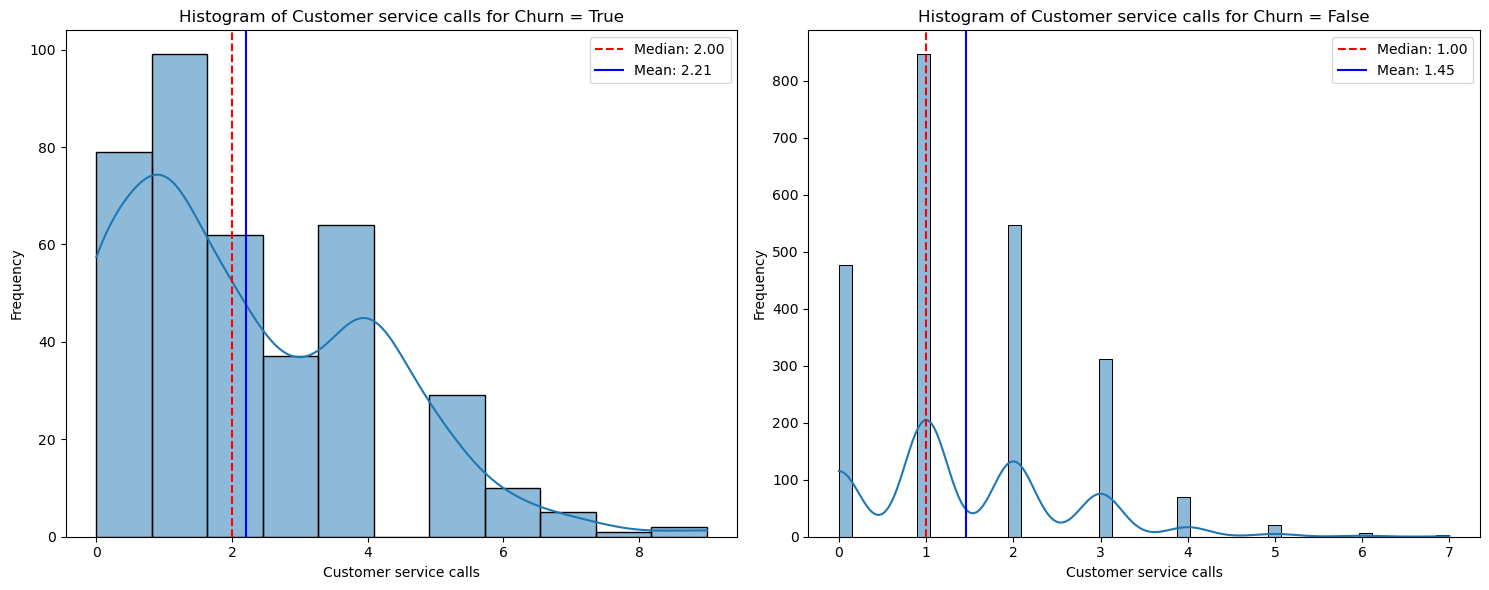

In [134]:
# Filter the data for Churn = True and Churn = False groups
data_true_churn = df_train.loc[df_train['Churn'] == True, 'Customer service calls']
data_false_churn = df_train.loc[df_train['Churn'] == False, 'Customer service calls']

# Calculate the median and mean for each group
median_true = data_true_churn.median()
mean_true = data_true_churn.mean()

median_false = data_false_churn.median()
mean_false = data_false_churn.mean()

# Create a subplot with 2 charts
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Draw a histogram with KDE for Churn = True data
sns.histplot(data_true_churn, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Customer service calls for Churn = True')
ax[0].set_xlabel('Customer service calls')
ax[0].set_ylabel('Frequency')

# Add vertical lines for the median and mean
ax[0].axvline(median_true, color='r', linestyle='--', label=f'Median: {median_true:.2f}')
ax[0].axvline(mean_true, color='b', linestyle='-', label=f'Mean: {mean_true:.2f}')

# Add annotations
ax[0].legend()

# Draw a histogram with KDE for Churn = False data
sns.histplot(data_false_churn, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Customer service calls for Churn = False')
ax[1].set_xlabel('Customer service calls')
ax[1].set_ylabel('Frequency')

# Add vertical lines for the median and mean
ax[1].axvline(median_false, color='r', linestyle='--', label=f'Median: {median_false:.2f}')
ax[1].axvline(mean_false, color='b', linestyle='-', label=f'Mean: {mean_false:.2f}')

# Add annotations
ax[1].legend()

# Display the chart
plt.tight_layout()
plt.show()


The chart on the left shows the number of customer service calls received by churned customers, while the chart on the right shows those received by non-churned customers. We can see that churned customers typically receive more customer service calls compared to non-churned customers. Fifty percent of churned customers received 2 or more calls, with an average of 2.21 calls and a maximum of 9 calls. In contrast, non-churned customers received an average of only 1.45 calls, with 50% receiving 1 or more calls and a maximum of 7 calls. This indicates that receiving a high number of customer service calls might make customers feel uncomfortable and increase the likelihood of them leaving the telecommunications company.

* Not Churn

In [148]:
df_churn_false = df_train[df_train['Churn'] == False]
df_churn_false

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total Charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,221.4,128,9.96,11.8,5,3.19,2,False,557.6,52.17
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,False,660.7,60.10
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,False,585.4,63.53
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,False,675.6,67.74


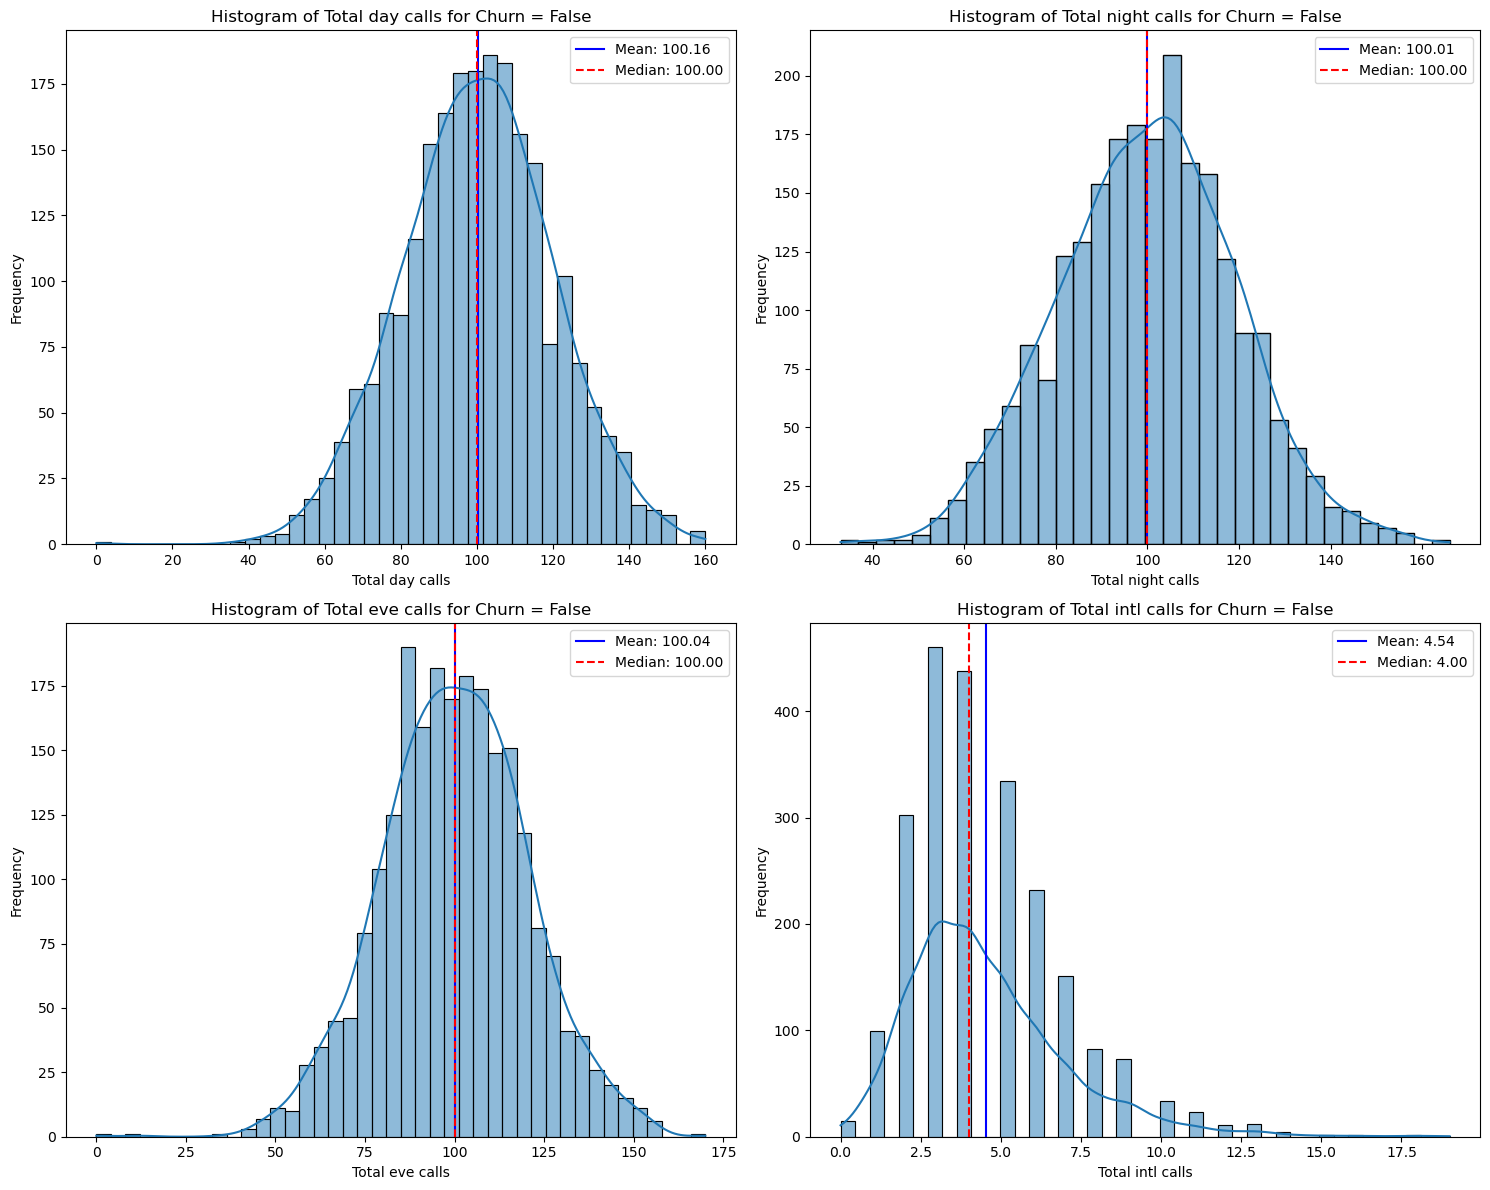

In [147]:
# List of columns to be plotted
cols_to_plot = ['Total day calls', 'Total night calls', 'Total eve calls', 'Total intl calls']

# Create a subplot with the corresponding number of charts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid for 4 charts
axes = axes.flatten()  # Convert 2D array to 1D for easier iteration

for i, col in enumerate(cols_to_plot):
    # Filter data to include only rows with Churn == False
    data_churn_false = df_train.loc[df_train['Churn'] == False, col]
    
    # Calculate the mean and median
    mean_value = data_churn_false.mean()
    median_value = data_churn_false.median()
    
    # Draw a histogram with KDE for the filtered data
    sns.histplot(data_churn_false, kde=True, ax=axes[i])
    
    # Draw vertical lines at the mean and median values
    axes[i].axvline(mean_value, color='blue', linestyle='-', label=f'Mean: {mean_value:.2f}')
    axes[i].axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
    
    # Set titles and labels for the chart
    axes[i].set_title(f'Histogram of {col} for Churn = False')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Add annotations
    axes[i].legend()

# Set the spacing between the charts
plt.tight_layout()

# Display the chart
plt.show()


On average, this customer group makes 100 calls in the morning, evening, and night. Meanwhile, the number of international calls is only about 4.5 calls per day. It can be seen that, although the morning rates are higher than those in the evening and night, this customer group still maintains a high volume of calls in the morning.

In [150]:
df_churn_false = df_train[df_train['Churn'] == False]
df_churn_false

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total Charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,221.4,128,9.96,11.8,5,3.19,2,False,557.6,52.17
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,False,660.7,60.10
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,False,585.4,63.53
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,False,675.6,67.74


In [152]:
Top5States_f = df_churn_false[['State']].value_counts().nlargest(5).reset_index()

Top5States_f = Top5States_f.rename(columns={Top5States_f.columns[1]: "So_kh"})
Top5States_f

,State,So_kh
0,WV,81
1,VA,63
2,AL,59
3,WY,58
4,WI,57


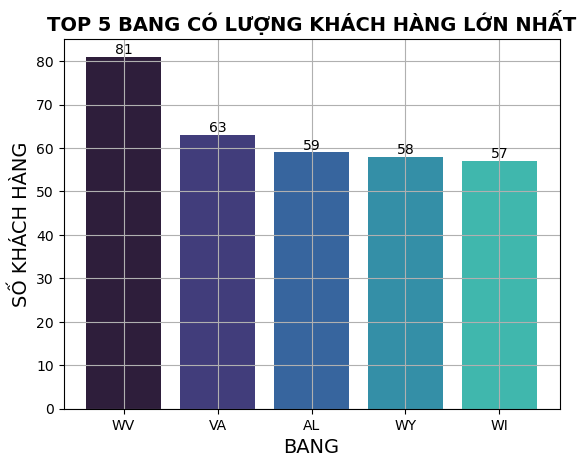

In [153]:
palette = sns.color_palette('mako')
plt.bar(Top5States_f['State'], Top5States_f['So_kh'], color=palette)
plt.title('TOP 5 BANG CÓ LƯỢNG KHÁCH HÀNG LỚN NHẤT', fontsize=14, fontweight='bold')
plt.xlabel('BANG', fontsize=14)
plt.ylabel('SỐ KHÁCH HÀNG', fontsize=14)
plt.grid(True)
# Add value to columns
for i, v in enumerate(Top5States_f['So_kh']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [201]:
df_churn_false['Total calls'] = df_churn_false['Total day calls'] + df_churn_false['Total eve calls'] + \
                            df_churn_false['Total night calls'] + df_churn_false['Total intl calls']

df_churn_false['Total minutes'] = df_churn_false['Total day minutes'] + df_churn_false['Total eve minutes'] + \
                            df_churn_false['Total night minutes'] + df_churn_false['Total intl minutes']

df_churn_false['Total charge'] = df_churn_false['Total day charge'] + df_churn_false['Total eve charge'] + \
                            df_churn_false['Total night charge'] + df_churn_false['Total intl charge']

total_day_calls_f = df_churn_false['Total calls'].sum()
total_state_f = df_churn_false['State'].count()
avg_day_calls_f = total_day_calls_f/total_state_f

total_day_minutes_f = df_churn_false['Total minutes'].sum()
avg_day_minutes_f = total_day_minutes_f/total_state_f

total_day_charge_f = df_churn_false['Total charge'].sum()
avg_day_charge_f = total_day_charge_f/total_state_f


print("Trung bình số cuộc gọi 1 ngày của 1 người: ", avg_day_calls_f)
print("Trung bình số phút gọi 1 ngày của 1 người: ", avg_day_minutes_f)
print("Trung bình số phí cước phải trả 1 ngày của 1 người: ", avg_day_charge_f)



Trung bình số cuộc gọi 1 ngày của 1 người:  304.7418788410887
Trung bình số phút gọi 1 ngày của 1 người:  584.559657594381
Trung bình số phí cước phải trả 1 ngày của 1 người:  58.42975856014047


C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\1133720240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_false['Total calls'] = df_churn_false['Total day calls'] + df_churn_false['Total eve calls'] + \
C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\1133720240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_false['Total minutes'] = df_churn_false['Total day minutes'] + df_churn_false['Total eve minutes'] + \
C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\1133720240.py:7: Sett

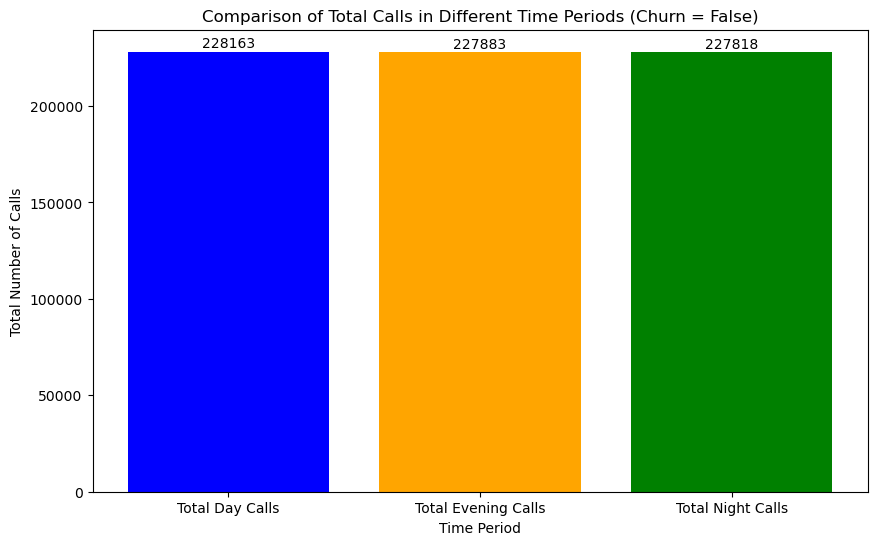

In [169]:
# Tính tổng số cuộc gọi cho mỗi buổi
total_day_calls = df_churn_false['Total day calls'].sum()
total_eve_calls = df_churn_false['Total eve calls'].sum()
total_night_calls = df_churn_false['Total night calls'].sum()

# Tạo danh sách các giá trị cần vẽ
totals = [total_day_calls, total_eve_calls, total_night_calls]
labels = ['Total Day Calls', 'Total Evening Calls', 'Total Night Calls']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, totals, color=['blue', 'orange', 'green'])

# Thêm giá trị tổng số lên trên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval)}', ha='center', va='bottom')

plt.title('Comparison of Total Calls in Different Time Periods (Churn = False)')
plt.xlabel('Time Period')
plt.ylabel('Total Number of Calls')
plt.show()


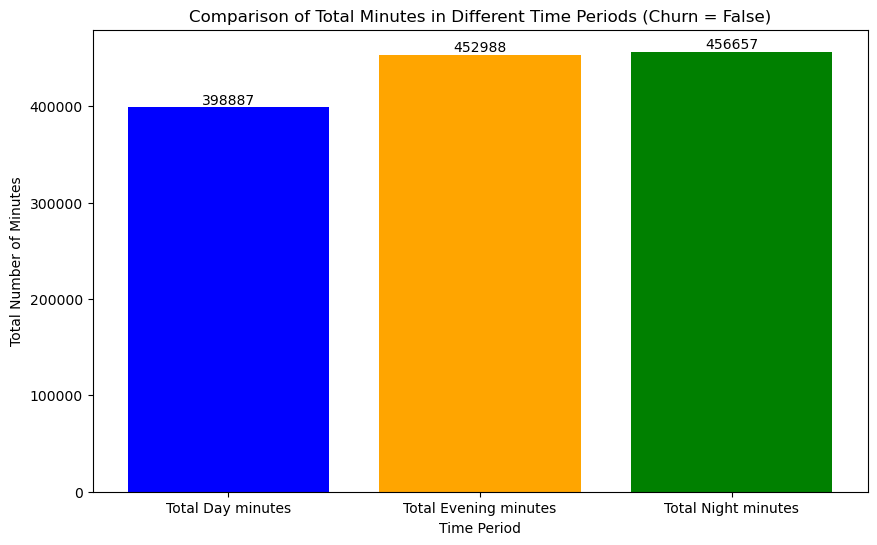

In [170]:
# Calculate the total number of calls for each period
total_day_minutes = df_churn_false['Total day minutes'].sum()
total_eve_minutes = df_churn_false['Total eve minutes'].sum()
total_night_minutes = df_churn_false['Total night minutes'].sum()

# Create a list of values to plot
totals = [total_day_minutes, total_eve_minutes, total_night_minutes]
labels = ['Total Day minutes', 'Total Evening minutes', 'Total Night minutes']

# Draw a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, totals, color=['blue', 'orange', 'green'])

# Add the total values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval)}', ha='center', va='bottom')

plt.title('Comparison of Total Minutes in Different Time Periods (Churn = False)')
plt.xlabel('Time Period')
plt.ylabel('Total Number of Minutes')
plt.show()


Although the number of calls is nearly equivalent across different periods, the call duration tends to increase during the night. This is understandable as daytime rates are the highest and nighttime rates are the lowest, which is why the number of minutes is always very high at night.

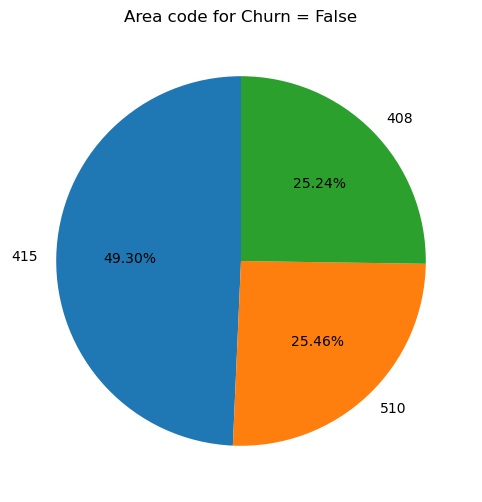

In [180]:
# Calculate the frequency of each value in the 'Area code' column
counts = df_churn_false['Area code'].value_counts()

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%.2f%%', startangle=90)
plt.title('Area code for Churn = False')
plt.show()


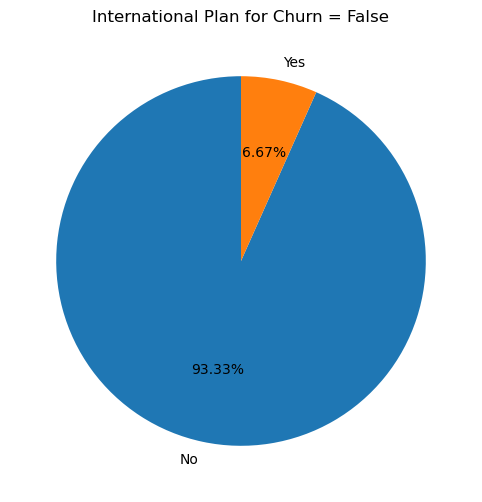

In [181]:
# Calculate the frequency of each value in the 'International Plan' column
counts = df_churn_false['International plan'].value_counts()

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%.2f%%', startangle=90)
plt.title('International Plan for Churn = False')
plt.show()


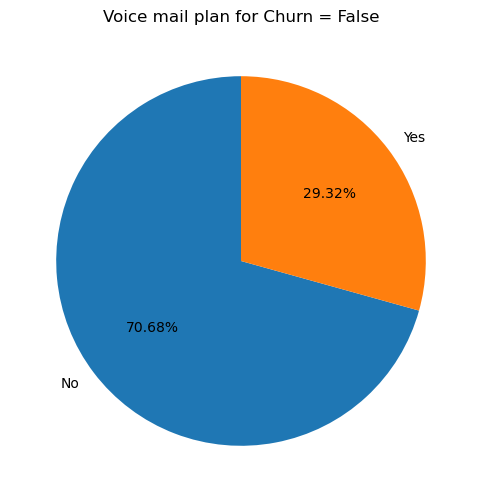

In [182]:
# Calculate the frequency of each value in the 'Voice mail plan' column
counts = df_churn_false['Voice mail plan'].value_counts()

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%.2f%%', startangle=90)
plt.title('Voice mail plan for Churn = False')
plt.show()


For this customer group, half are from the region with area code 415, while the remaining two-thirds are evenly split between regions 408 and 415. The percentage of customers not using the international plan is up to 93.33%. Therefore, the majority do not use the international plan. Additionally, most of this group also does not use the voicemail plan (70.68%), with only 29.32% using it.

For this customer group, the following characteristics can be observed:

- Primarily from states such as WV, VA, AL, etc.
- On average, they make 304 calls per day (morning, evening, and night have nearly the same total number of calls).
- On average, they make 585 minutes of calls per day, with call duration tending to increase at night.
- Typically, they pay $58.5 per day.
- Primarily have area code 415.
- Virtually do not use the international plan or voicemail plan.
- On average, they receive 1.45 support calls from the customer service center.

From this, strategies can be developed to continue retaining this customer group:

- Increase promotional programs in the states with the highest number of customers to continue retaining them.
- Offer incentives to customers with many calls and high call minutes per day.
- Reduce morning rates to help customers ease their financial burden and protect their health.
- Create incentives for the 415 region and states within this area.
- Continue to minimize the number of support calls from the customer service center.

* Churn

In [183]:
df_churn_true = df_train[df_train['Churn'] == True]
df_churn_true

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total Charge,Total calls
18,CO,77,408,No,No,0,62.4,89,10.61,169.9,...,64,9.43,5.7,6,1.54,5,True,447.6,36.02,280
28,AZ,12,408,No,No,0,249.6,118,42.43,252.4,...,90,12.61,11.8,3,3.19,1,True,794.0,79.68,330
35,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,...,78,5.50,14.6,15,3.94,0,True,513.8,56.20,285
45,WY,87,415,No,No,0,151.0,83,25.67,219.7,...,127,9.18,9.7,3,2.62,5,True,584.3,56.14,329
48,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,...,77,8.15,5.8,3,1.57,3,True,460.7,49.85,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,MI,119,510,Yes,Yes,22,172.1,119,29.26,223.6,...,94,6.75,13.9,20,3.75,1,True,559.6,58.77,366
2641,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,...,80,9.29,13.8,5,3.73,4,True,605.0,61.54,339
2656,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,...,133,5.40,9.7,4,2.62,4,True,466.2,48.51,315
2657,MD,62,408,No,No,0,321.1,105,54.59,265.5,...,72,8.12,11.5,2,3.11,4,True,778.6,88.39,301


In [184]:
#Top 5 States with the most customers
Top5States_t = df_churn_true[['State']].value_counts().nlargest(5).reset_index()

Top5States_t = Top5States_t.rename(columns={Top5States_t.columns[1]: "So_kh"})
Top5States_t

,State,So_kh
0,TX,16
1,MD,14
2,NJ,14
3,MI,13
4,MN,13


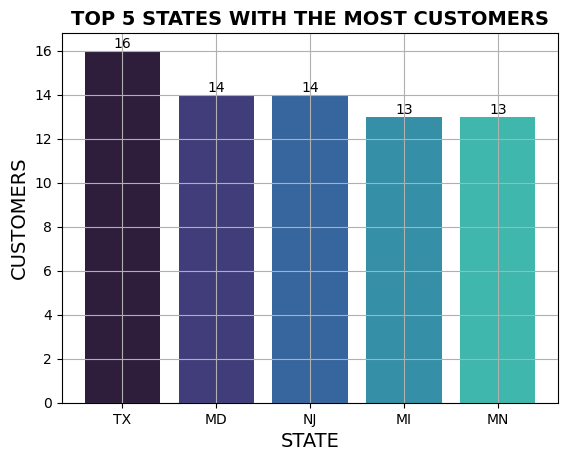

In [314]:
palette = sns.color_palette('mako')
plt.bar(Top5States_t['State'], Top5States_t['So_kh'], color=palette)
plt.title('TOP 5 STATES WITH THE MOST CUSTOMERS', fontsize=14, fontweight='bold')
plt.xlabel('STATE', fontsize=14)
plt.ylabel('CUSTOMERS', fontsize=14)
plt.grid(True)
# add value into columns
for i, v in enumerate(Top5States_t['So_kh']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [200]:
df_churn_true['Total calls'] = df_churn_true['Total day calls'] + df_churn_true['Total eve calls'] + \
                            df_churn_true['Total night calls'] + df_churn_true['Total intl calls']

df_churn_true['Total minutes'] = df_churn_true['Total day minutes'] + df_churn_true['Total eve minutes'] + \
                            df_churn_true['Total night minutes'] + df_churn_true['Total intl minutes']

df_churn_true['Total charge'] = df_churn_true['Total day charge'] + df_churn_true['Total eve charge'] + \
                            df_churn_true['Total night charge'] + df_churn_true['Total intl charge']

total_day_calls_t = df_churn_true['Total calls'].sum()
total_state_t = df_churn_true['State'].count()
avg_day_calls_t = total_day_calls_t/total_state_t

total_day_minutes_t = df_churn_true['Total minutes'].sum()
avg_day_minutes_t = total_day_minutes_t/total_state_t

total_day_charge_t = df_churn_true['Total charge'].sum()
avg_day_charge_t = total_day_charge_t/total_state_t


print("Trung bình số cuộc gọi 1 ngày của 1 người: ", avg_day_calls_t)
print("Trung bình số phút gọi 1 ngày của 1 người: ", avg_day_minutes_t)
print("Trung bình số phí cước phải trả 1 ngày của 1 người: ", avg_day_charge_t)


Trung bình số cuộc gọi 1 ngày của 1 người:  305.87886597938143
Trung bình số phút gọi 1 ngày của 1 người:  630.6930412371133
Trung bình số phí cước phải trả 1 ngày của 1 người:  64.83981958762887


C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\3586870521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_true['Total calls'] = df_churn_true['Total day calls'] + df_churn_true['Total eve calls'] + \
C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\3586870521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_true['Total minutes'] = df_churn_true['Total day minutes'] + df_churn_true['Total eve minutes'] + \
C:\Users\Admin\AppData\Local\Temp\ipykernel_6348\3586870521.py:7: SettingWit

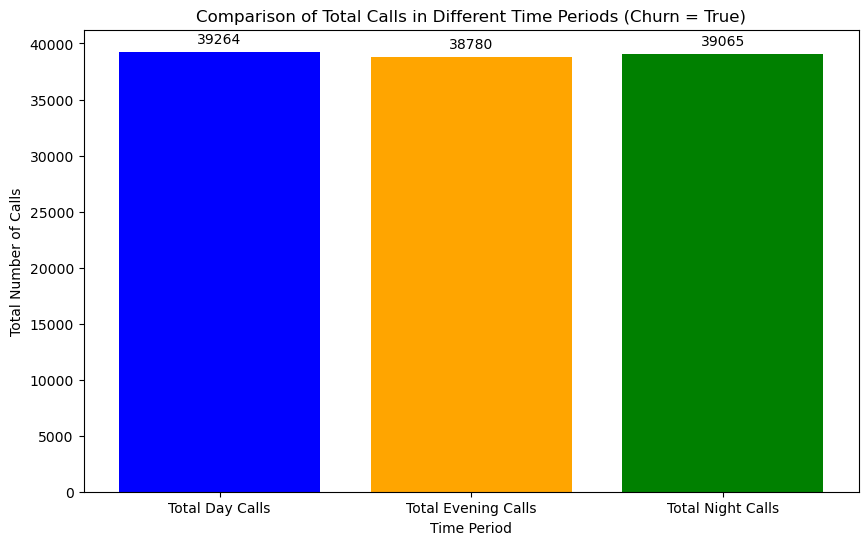

In [203]:
# Calculate the total number of calls for each period
total_day_calls_tt = df_churn_true['Total day calls'].sum()
total_eve_calls_tt = df_churn_true['Total eve calls'].sum()
total_night_calls_tt = df_churn_true['Total night calls'].sum()

# Create a list of values to plot
totals_t = [total_day_calls_tt, total_eve_calls_tt, total_night_calls_tt]
labels_t = ['Total Day Calls', 'Total Evening Calls', 'Total Night Calls']

# Draw a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels_t, totals_t, color=['blue', 'orange', 'green'])

# Add the total values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval)}', ha='center', va='bottom')

plt.title('Comparison of Total Calls in Different Time Periods (Churn = True)')
plt.xlabel('Time Period')
plt.ylabel('Total Number of Calls')
plt.show()


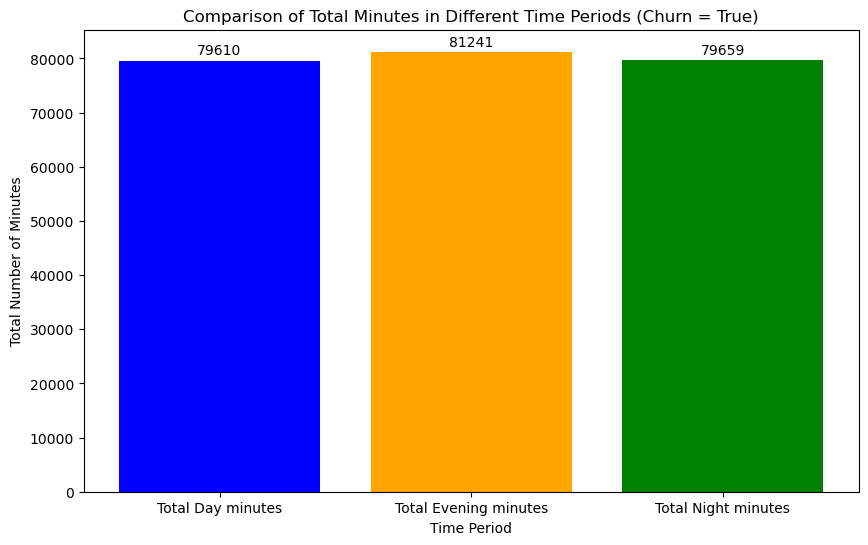

In [204]:
# Calculate the total number of minutes for each period
total_day_minutes_t = df_churn_true['Total day minutes'].sum()
total_eve_minutes_t = df_churn_true['Total eve minutes'].sum()
total_night_minutes_t = df_churn_true['Total night minutes'].sum()

# Create a list of values to plot
totals_ttt = [total_day_minutes_t, total_eve_minutes_t, total_night_minutes_t]
labels_tt = ['Total Day minutes', 'Total Evening minutes', 'Total Night minutes']

# Draw a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels_tt, totals_ttt, color=['blue', 'orange', 'green'])

# Add the total values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{int(yval)}', ha='center', va='bottom')

plt.title('Comparison of Total Minutes in Different Time Periods (Churn = True)')
plt.xlabel('Time Period')
plt.ylabel('Total Number of Minutes')
plt.show()

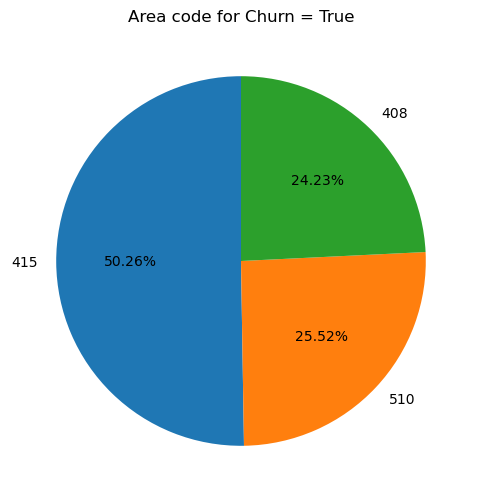

In [205]:
# Calculate the frequency of each value in the 'Area code' column
counts_t = df_churn_true['Area code'].value_counts()

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts_t, labels=counts_t.index, autopct='%.2f%%', startangle=90)
plt.title('Area code for Churn = True')
plt.show()


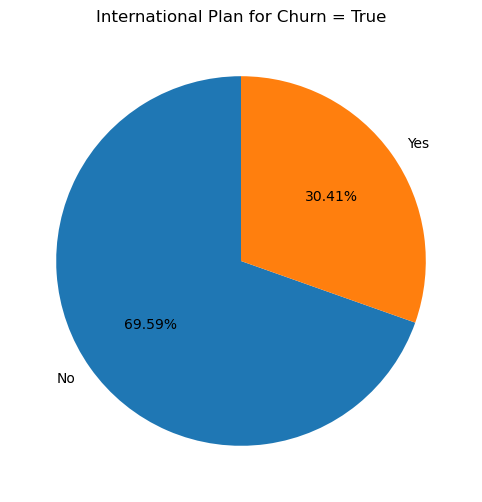

In [206]:
# Calculate the frequency of each value in the 'International plan' column
counts_tt = df_churn_true['International plan'].value_counts()

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts_tt, labels=counts_tt.index, autopct='%.2f%%', startangle=90)
plt.title('International Plan for Churn = True')
plt.show()


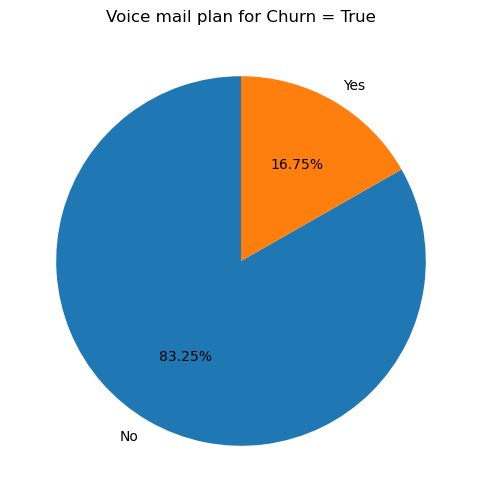

In [208]:
# Calculate the frequency of each value in the 'Voice mail plan' column
counts_ttt = df_churn_true['Voice mail plan'].value_counts()

# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts_ttt, labels=counts_ttt.index, autopct='%.2f%%', startangle=90)
plt.title('Voice mail plan for Churn = True')
plt.show()


For this customer group, the following characteristics can be observed:

- Primarily from states such as TX, MD, NJ, etc.
- On average, they make 306 calls per day.
- On average, they use 630 minutes per day, with the most calls occurring in the evening.
- The average daily charge is $64.8.
- Primarily have area code 415.
- 30% use the international plan, and 16.75% use the voicemail plan (a very low number).
- On average, they receive more than 2 support calls from the customer service center each day.

Strategies to reduce the percentage of customers churning:

- Lower rates for morning and evening calls.
- Offer promotions for customers with a high number of calls and high call minutes.
- Improve phone service quality.
- Reduce unnecessary support calls from the customer service center each day.
- Provide special incentives in the 415 area and states within this region.

Removing Outliers & Features Selection

Returning to df_train, we see that the dataset contains features with a normal distribution. Therefore, we can use the characteristics of the normal distribution to remove outliers. The normal distribution follows the 68-95-99.7 rule. Typically, data points outside of 3z (97%) are considered outliers and should be removed from the dataset.

In [210]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [211]:
# Remove the last 3 columns from df_train
df_train = df_train.iloc[:, :-3]

In [215]:
# Use z-scores
numerical_cols = ['Total day minutes', 'Total day charge', 'Total night minutes', 'Total night charge', 'Total eve minutes', 'Total eve charge', 'Total night calls']

z_scores = df_train[numerical_cols].apply(zscore)
threshold = 3

# Filter DataFrame to exclude outliers
df_no_outliers = df_train[(z_scores.abs() < threshold).all(axis=1)]

# Calculate the percentage of outliers before removal
outliers_percentage_before = (df_train.shape[0] - df_no_outliers.shape[0]) / df_train.shape[0] * 100

# Display the shape before removing outliers
print("DataFrame shape before removing outliers:", df_train.shape)

# Display the number of removed rows (outliers)
removed_rows = df_train.shape[0] - df_no_outliers.shape[0]
print("Number of removed rows (outliers):", removed_rows)

# Display the percentage of outliers before removal
print("Percentage of outliers before removal:", outliers_percentage_before, "%")

# Update the original DataFrame with outliers removed
df_train = df_no_outliers.copy()

# Display the updated DataFrame shape
print("DataFrame shape after removing outliers:", df_train.shape)

# Calculate the percentage of outliers after removal
outliers_percentage_after = 0  # Since all outliers have been removed, the percentage is now 0

# Display the percentage of outliers after removal
print("Percentage of outliers after removal:", outliers_percentage_after, "%")

DataFrame shape before removing outliers: (2666, 20)
Number of removed rows (outliers): 30
Percentage of outliers before removal: 1.1252813203300824 %
DataFrame shape after removing outliers: (2636, 20)
Percentage of outliers after removal: 0 %


After removing outliers, we will begin encoding the columns with data types of object and bool.

In [308]:
categorical_features = df_train.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in categorical_features:
    df_train[feature] = le.fit_transform(df_train[feature])
df_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total Charge
0,16,128,415,0,1,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,717.2,75.56
1,35,107,415,0,1,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,625.2,59.24
2,31,137,415,0,0,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,539.4,62.29
3,35,84,408,1,0,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,564.8,66.80
4,36,75,415,1,0,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,512.0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,134.7,98,22.90,189.7,...,221.4,128,9.96,11.8,5,3.19,2,0,557.6,52.17
2662,3,192,415,0,1,36,156.2,77,26.55,215.5,...,279.1,83,12.56,9.9,6,2.67,2,0,660.7,60.10
2663,49,68,415,0,0,0,231.1,57,39.29,153.4,...,191.3,123,8.61,9.6,4,2.59,3,0,585.4,63.53
2664,39,28,510,0,0,0,180.8,109,30.74,288.8,...,191.9,91,8.64,14.1,6,3.81,2,0,675.6,67.74


In [306]:
categorical_features_t = df_test.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in categorical_features_t:
    df_test[feature] = le.fit_transform(df_test[feature])
df_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,48,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
663,1,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
664,46,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
665,49,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


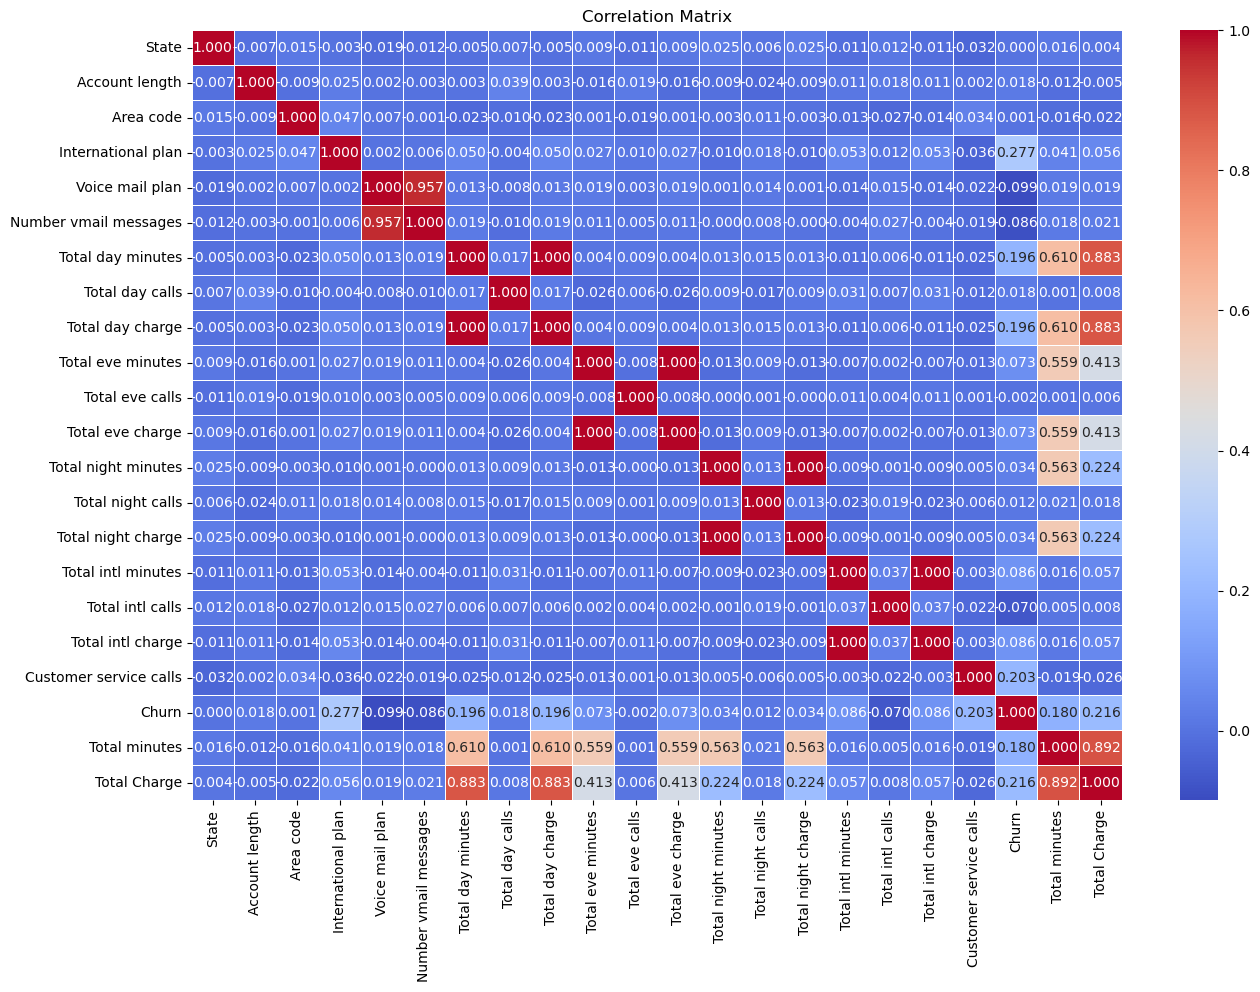

In [310]:
corr_matrix = df_train.corr()
plt.figure(figsize=(15, 10))  # Kích thước của biểu đồ
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Here, we see a few issues.

First, the features 'Total day charge' and 'Total day minutes'; 'Total eve charge' and 'Total eve minutes'; 'Total night charge' and 'Total night minutes'; and 'Total intl charge' and 'Total intl minutes' have a correlation of up to 1.0. This is a case of multicollinearity, where features have very high correlations with each other. If not addressed, this can affect the model's training results. Therefore, we will remove some of the attributes that have absolute correlations with each other.

Next, there are a few features with very low or seemingly no correlation with the target column. Thus, we can also remove these to speed up the model training process.

In [270]:
df_train_ver_2 = df_train
df_train_ver_2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [271]:
# Remove unwanted columns
df_train_ver_2 = df_train_ver_2.drop(columns=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'])
df_train_ver_2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,98,22.90,68,16.12,128,9.96,5,3.19,2,0
2662,3,192,415,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
2663,49,68,415,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
2664,39,28,510,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0


In [269]:
df_test = df_test.drop(columns=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'])
df_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,97,31.37,80,29.89,90,9.71,4,2.35,1,False
1,IN,65,415,No,No,0,137,21.95,83,19.42,111,9.40,6,3.43,4,True
2,NY,161,415,No,No,0,67,56.59,97,27.01,128,7.23,9,1.46,4,True
3,SC,111,415,No,No,0,103,18.77,102,11.67,105,8.53,6,2.08,2,False
4,HI,49,510,No,No,0,117,20.28,109,18.28,90,8.04,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,88,23.31,125,13.23,94,11.14,7,3.11,2,False
663,AL,106,408,No,Yes,29,131,14.21,131,17.33,73,10.33,3,2.19,1,False
664,VT,60,415,No,No,0,118,32.96,110,7.23,134,9.45,8,3.56,3,False
665,WV,159,415,No,No,0,114,28.87,105,16.80,82,8.72,4,3.13,1,False


TRAINING MODELS

In [253]:
X = df_train_ver_2.drop(columns = ['Churn'])
y = df_train_ver_2['Churn']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

As observed from the beginning, the churn and non-churn rates in this dataset are imbalanced. Therefore, we need to use SMOTE to resample the data to help the model avoid overfitting and improve predictions. However, we apply this technique after splitting the dataset to ensure the most objective and accurate predictions.

In [311]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [313]:
X_train_resampled

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,34,94,415,0,0,0,91,32.370000,107,7.820000,108,10.120000,17,3.670000,2
1,33,118,510,0,1,35,119,43.570000,91,21.940000,130,9.700000,1,3.160000,1
2,17,108,415,0,1,35,136,28.870000,101,14.760000,105,9.660000,7,2.570000,2
3,5,119,408,0,0,0,68,21.130000,88,17.600000,93,7.080000,1,4.000000,0
4,50,94,510,0,0,0,105,46.100000,105,17.220000,51,9.970000,3,3.110000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,17,67,415,1,0,0,124,34.782410,90,11.422098,122,7.118776,6,4.230850,1
3608,22,91,415,1,0,0,62,35.114733,116,17.167846,108,9.929500,4,4.745303,1
3609,30,125,510,0,0,0,88,41.791186,92,18.780729,126,10.339167,5,3.634537,0
3610,33,87,415,0,0,0,61,28.344372,87,14.987671,128,10.764481,6,1.883720,4


In [265]:
xgb = XGBClassifier(random_state = 42)

# Set the values for the parameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
}

# Find the optimal parameters using GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Print the best results
print("Best n_estimators:", grid_search_xgb.best_params_['n_estimators'])
print("Best subsample:", grid_search_xgb.best_params_['subsample'])


# Evaluate the model with the best parameters on the test set
best_model_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = best_model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)


print("Classification Report:\n", report_xgb)
print("Accuracy:", accuracy_xgb*100)

Best n_estimators: 200
Best subsample: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       449
           1       0.65      0.67      0.66        79

    accuracy                           0.90       528
   macro avg       0.80      0.80      0.80       528
weighted avg       0.90      0.90      0.90       528

Accuracy: 89.77272727272727


In [259]:
svc = SVC()
svc.fit(X_train_resampled, y_train_resampled)
        
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           refit=True, verbose=2, cv=5, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)


print("Best C:", grid_search.best_params_['C'])
print("Best gamma:", grid_search.best_params_['gamma'])
print("Best kernel:", grid_search.best_params_['kernel'])
    
# Make predictions
y_pred_svc = grid_search.predict(X_test)
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_svc))

# Evaluate the classifier
print("SVC Classifier Report:\n", classification_report(y_test, y_pred_svc))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best C: 10
Best gamma: 0.01
Best kernel: rbf
Accuracy Score:
 0.8428030303030303
SVC Classifier Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       449
           1       0.17      0.01      0.02        79

    accuracy                           0.84       528
   macro avg       0.51      0.50      0.47       528
weighted avg       0.75      0.84      0.78       528



In [260]:
# Determine the values for max depth, min samples leaf, and min samples split to be tested
param_grid = {'max_depth': [None, 10, 15, 20, 30],
              'min_samples_leaf': [2, 3, 4],
              'min_samples_split': [3, 4, 5, 6, 8, 9]}

# Create the decision tree model
dt = DecisionTreeClassifier(random_state = 42)

# Find the optimal hyperparameters using GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set with the best model
y_pred_dt = grid_search.predict(X_test)

# Print the optimal value for depth
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])
print("Best min_samples_split:", grid_search.best_params_['min_samples_split'])

# Evaluate performance
accuracy_DT = accuracy_score(y_test, y_pred_dt)
report_DT = classification_report(y_test, y_pred_dt)


print("Decision Tree Classification Report:\n", report_DT)

print("Accuracy:", accuracy_DT*100)

Best max_depth: None
Best min_samples_leaf: 2
Best min_samples_split: 3
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.88       449
           1       0.42      0.68      0.52        79

    accuracy                           0.81       528
   macro avg       0.68      0.76      0.70       528
weighted avg       0.86      0.81      0.83       528

Accuracy: 81.25


In [261]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring = 'accuracy')

# Training model
grid_search.fit(X_train_resampled, y_train_resampled)

best_model_rf = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred_rf = best_model_rf.predict(X_test)

# Print the optimal value for depth
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best max_features:", grid_search.best_params_['max_features'])
print("Best max_depth:", grid_search.best_params_['max_depth'])

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classification Report:\n", report_rf)

print("Accuracy:", accuracy_rf*100)

Best n_estimators: 200
Best max_features: sqrt
Best max_depth: 20
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       449
           1       0.63      0.67      0.65        79

    accuracy                           0.89       528
   macro avg       0.79      0.80      0.79       528
weighted avg       0.89      0.89      0.89       528

Accuracy: 89.20454545454545


Here, we see that the two ensemble learning techniques have the highest accuracy rates. However, XGBoost is slightly better, so we will choose XGBoost as the algorithm to solve this problem.

In [278]:
#Test in df_test
data_test = df_test.drop(columns = ['Churn'])
reality = df_test['Churn']
y_pred_xgb = grid_search_xgb.predict(data_test)

comparison = pd.DataFrame({'Prediction':y_pred_xgb,
              'Groundtruth': reality})
comparison

,Prediction,Groundtruth
0,0,0
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
662,0,0
663,0,0
664,0,0
665,0,0


In [279]:
# Find the wrong predicted data
comparison['Difference'] = comparison['Prediction'] != comparison['Groundtruth']
ratio = round(comparison['Difference'].sum()/len(comparison)*100,2)
print('In the test dataset ({} rows), there are {} wrong predicted data, accounting for {}%.'.format(len(comparison), comparison['Difference'].sum(), ratio))

In the test dataset (667 rows), there are 72 wrong predicted data, accounting for 10.79%.
